# LGBIO2060: Project 1
---
Modelling of biological systems

👥 Authors: Gabriel de Morais and Gabriela Ishikawa



### Q1)  🔮 Explore the data


#### A) What are the variables the experimenter control? What changes over the different trials? What variables are the results of the experiment, what is measured?


Before adressing the question, it's essential to understand the variables within the dataset. Therefore, the initial cells present an exploratory analysis of eight specific variables. For visualization purposes, we opted to focus on Subject 5 and trial 555.

In [1]:
import pickle

# Loading the data set 
with open('data.pkl', 'rb') as file_pkl:
    my_data = pickle.load(file_pkl)

In [2]:
# Getting the data of Subject 5
subjects = my_data.keys()
trials = my_data['Subject5']

# Getting the Trial 555 of Subject 5
trial555 = trials['Trial555']


In [3]:
import matplotlib.pyplot as plt

HandPos = trial555['HandPos']
HandPosX = HandPos[:,0]
HandPosY = HandPos[:,1]
TargetPos = trial555['TargetPos']
TimeStep = trial555['Timestep']

interactive(children=(FloatSlider(value=0.0, description='Tempo', max=200.0, step=1.0), Output()), _dom_classe…

<function __main__.update_grafico(tempo_atual)>

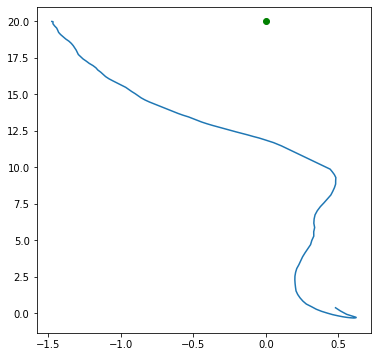

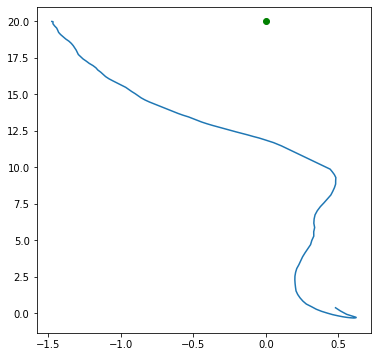

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Gere alguns dados de exemplo (200 pontos de dados)
tempo = TimeStep
x = HandPosX
y = HandPosY

# Função para atualizar o gráfico com base no valor do controle deslizante
def update_grafico(tempo_atual):
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, label='Trajetória')
    plt.scatter(TargetPos[0,0], TargetPos[0,1], color='green', marker='o', label='Target')
    plt.scatter(x[int(tempo_atual * len(tempo) / 200)], y[int(tempo_atual * len(tempo) / 200)], color='red', marker='o', label='Posição')
    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Crie um controle deslizante para navegar no tempo
tempo_slider = widgets.FloatSlider(value=0, min=0, max=200, step=1, description='Tempo')
interact(update_grafico, tempo_atual=tempo_slider)


In [5]:
trial555['LateralShift']

1.73544311523438

In [6]:
trial555['CursorPos']

[array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),


From the guidelines, we have the follow informations about the variables:

`Condition`: integer informing the kind of feedback given to the subject (either 1, 2, 3 or 4)

`Condition_Name`: string informing the kind of feedback given to the subject: “shift”, “small blur”, “large blur” or “occluded”.

`CursorPos`: list of 200 numpy arrays, one for each time step. In each array, one line gives the x,y and z coordinates of one dot of the feedback given to the subject on the screen. If the feedback is a cloud of dot, the array is size (25,3), else the array is size (3,). When the feedback is occluded, the arrays are filled with ‘nan’.

`HandPos`: Array of size (200, 3) giving the hand position (x, y, z-coordinates) at each time steps 

`LateralShift`: value in cm giving the lateral shift between the hand position and the feedback given through the screen.

`TargetPos`: Array of size (200, 3) giving the target position (x, y, z-coordinates) at each time steps.

`Time`: Array of float of size (200,).

`TimeStep`: Array of int of size (200,)

### B) Plot some relevant figures that represent the data. For example, it could be typical trials for one subject, it could a mean trajectory over the subjects, over the conditions... Justify your choice. 

Dizer que o cérebro usa Bayesian estimation quer dizer que, para estimar a distribuição posterior, consideramos a distribuição prior e evidencia seguindo a regra de Bayes:

$$ p(A|B) = p (B|A)\frac{p(A)}{p(B)} $$

A: current trial given an evidence -or- lateral shift -or- prior

B: evidence

p(A): prior distribution of A

p(B|A): likelihood of getting B when A is true

A pergunta que nós queremos responder é: será que o cérebro usa processo Bayesiano em processos sensomotores para integrar as informações vindas dos sensores e do prior knowledge? Duas perguntas que poderiam ser feitas anteriormente à essa: será que o cérebro realmente usa modelos estatísticos para armazenar as informações vindas dos olhos e de atividades sensomotores prévias (prior knowledge)? Afinal, se o cérebro não conseguir representar estatisticamente a incerteza relacionada às informações sensoriais e prior, de nada serveria usar o modelo Baeysiano e a primeria pergunta não faria sentido. 

Vamos então reorganizar as perguntas:

1) Será que o prior knowledge é representado mentalmente através de uma distribuição estatística com incertezas associadas à este processo?

2) Será que as informações sensoriais são representadas mentalmente através de uma distribuição estatística com incertezas associadas à este processo?

3) Será que o cérebro usa processo Bayesiano para integrar essas informações?

Para responder a primeira pergunta: precisamos achar uma forma relevante de representar o prior knowledge. Para isto: selecionar casos em que não há feedback e que também não aparece o resultado no final (afinal não queremos influência da atividade sensorial). Escolher um/vários subjects e plotar a distribuição vs prior lateral shift (cm). Em seguida plotar em cima uma gaussiana com mpedia 1 e dp 0.5 cm.  

Podemos fazer esse plot tanto para cada subject e mostrar que, de fato, o cérebro identificou que o lateral shift era de 1 cm. De acordo com o artigo, a média vai dar 0.97 +- 0.06 cm. 

O artigo não fala nada do desvio padrão desse valor, mas podemos calculá-lo. Muito provavelmente ele será diferente de 0.5, isto provavelmente pq os participantes foram treinados sob várias condições: com/sem blur, com/sem feedback. Então eles aprenderam que a média era de 1cm mas o desvio padrão diferente de 0.5cm indica uma adaptabilidade à essas demais situações...

Saber se as informações sensoriais são realmente representadas mentalmente através de uma distribuição estatística significaria ser capaz de medir diretamente as incertezas associadas à visão. No entanto, essas informações são "contaminadas" com o prior knowledge natural de cada ser humano. O experimento, ao controlar o ambiente, tenta controlar esse "prior" natural. Vamos então considerar que, realmente, a visão é armazenada como um distribuição estatística.

Esta visão é consistente com estudos: 25, 26 27

26. Basso, M. A. & Wurtz, R. H. Modulation of neuronal activity in superior colliculus by changes in target probability. J. Neurosci. 18, 7519–7534 (1998).
27. Platt, M. L. & Glimcher, P. W. Neural correlates of decision variables in parietal cortex. Nature 400, 233–238 (1999).
28. Carpenter, R. H. & Williams, M. L. Neural computation of log likelihood in control of saccadic eye movements. Nature 377, 59–62 (1995).

Apesar de não estar no artigo, acho que um dos jeitos que a gente pode ao menos inferir sobre esse tópio é fazer o seguinte:

Plotar a distribuição do true lateral shift para os casos 1, 2, 3, e 4. Fazer em um mesmo gráfico com diferentes curvas para cada um casos. Vamos ver que todos seguem uma distribuição gaussiana mas com médias e desvio padrões diferentes. Sabendo que operações com gaussianas resultam em gaussianas, estaríamos apontando na direção de que, de fato, o cérebro usa modelos estatísticos para os olhos. No entanto, isso não é uma prova pelo problema definido anteriormente: prior natural.

Conclusão: o cérebro usa modelos estatístios para armazenar informação sensorial e prior.

Esses são os plot esseniais, mas podemos fazer também o plot da trajetória média nos candidatos para cada condição... mas não sei o que isso iria ajudar a não ser mostrar o caminho mesmo kkkk. Porque no final das contas, o que importa é o estimated lateral shift, que é a métrica usada para comparar com o real shfit e responder às hipóteses.

### Q2)   🧮 Do the subjects use a Bayesian strategy to estimate the shift or a naïve compensation?

#### A) First, identify the prior distribution and the likelihood. Do these distribution change according to the trials?


The prior distribution: p(A) acho que é a gaussiana...

The likelihood: p(B|A)

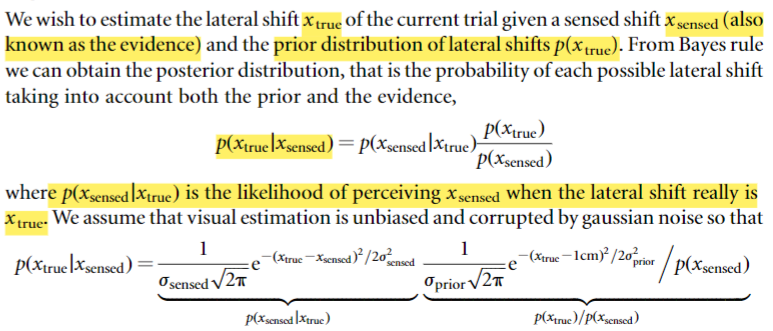

#### B) In the case you use a Bayesian strategy, compute the shift estimation for a true shift of 1.5 cm with feedback associated with a variance of 0.1 cm. With this shift estimate, what will be the deviation from target at the end of the movement (considering that the execution of the movement perfectly reflects the position that the subject aims)?

Prior distribution: gaussian with mean 1 and dp 0.5 cm -> p(true)
Do exercício anterior temos a likelihood


#### C) How will evolve this error (deviation from target) for different shifts? Sketch a graph and describe it qualitatively.

#### D) How would this graph change if the variability of the feedback decreases/increases? Add two traces on the previous graph (corresponding to a more reliable feedback and a less reliable feedback).


#### E) Build these theoretical graphs with the experimental data and discuss the results. Check that the theory applies to each condition and each subject.


#### F) In comparison with a Bayesian strategy, the naïve strategy would consist in ignoring the prior and only use the feedback. How would evolve the error with this strategy? Which strategy is better? Why? 